In [1]:
pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 842.2 kB/s eta 0:00:00


In [2]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import catboost as cb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import category_encoders as ce

import warnings

warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Loading Data

In [44]:
test=pd.read_csv('/content/drive/MyDrive/kag fellow/test_final.csv',index_col=0)
train=pd.read_csv('/content/drive/MyDrive/kag fellow/train_imputed_rf.csv',index_col=0)

In [ ]:
# df=pd.concat([train,test])
# df.shape

(90271, 50)

### High-Cardinality categorical features Encoding

In [5]:
# encoder=ce.binary.BinaryEncoder(cols=categorical_features)
# df=encoder.fit_transform(df)

### Imputing Null values using RF Iterative imputer

In [ ]:
# imputer = IterativeImputer(estimator=RandomForestRegressor(),
#                            missing_values=np.nan,
#                            max_iter=10,
#                            random_state=42,verbose=True)

In [ ]:
# # Replace infinite values with NaN
# df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# # Fit the imputer on the training data
# imputer.fit(df.drop(['id'],axis=1))

# # Transform the data (both training and test sets)
# imputed_data = imputer.transform(df.drop(['id'],axis=1))

[IterativeImputer] Completing matrix with shape (90271, 98)
[IterativeImputer] Change: 2155839.1287154267, scaled tolerance: 164025000.0 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (90271, 98)


In [ ]:

# imputed_df = pd.DataFrame(imputed_data, columns=df.drop(['id'],axis=1).columns)

In [ ]:
# imputed_df.to_csv('/content/drive/MyDrive/kag fellow/imputed_df.csv')

In [ ]:
# train_imputed=imputed_df.iloc[:len(train)]
# test_imputed=imputed_df.drop('price',axis=1).iloc[len(train):]
# train_imputed.shape,test_imputed.shape

((54088, 98), (36183, 97))

In [45]:
X=train.drop(['price','id'],axis=1)

y=train['price']

### Creating Ploynomial Features For Train

In [46]:
# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
columns=['power', 'engine_size', 'engine_cylinders','milage','model_year']

In [47]:
# Fit and transform the data
poly_features = poly.fit_transform(X[columns])
poly_feature_names = poly.get_feature_names_out(X[columns].columns)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

In [48]:
# Drop the original columns that were transformed
data_dropped = X.drop(columns=columns)

# Combine the transformed columns with the rest of the dataset
final_df = pd.concat([data_dropped, poly_df], axis=1)

In [49]:
X=final_df.drop(['mil_sq'],axis=1)

In [26]:
# X=final_df[new_features]

### Regression With Catboost

In [90]:
parameters={'learning_rate': 0.1249559896578208, 'depth': 6, 'l2_leaf_reg': 1.0713167525409886e-05, 'random_strength': 45.92164074724928, 'grow_policy': 'Lossguide', 'max_bin': 340, 'min_data_in_leaf': 95, 'bootstrap_type': 'Bernoulli', 'subsample': 0.5975948509844397}

In [113]:
# para={'learning_rate': 0.14992741948307348, 'depth': 7, 'l2_leaf_reg': 0.02488034585358472, 'random_strength': 35.503400882929746, 'grow_policy': 'SymmetricTree', 'max_bin': 74, 'min_data_in_leaf': 43, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.9091120937507686}
regressor=cb.CatBoostRegressor(n_estimators=87,**parameters,
                               verbose=100)
# Define RMSE as the scoring metric
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(regressor, X, y, cv=kf, scoring=rmse_scorer)

# Calculate mean RMSE
mean_rmse = np.mean(-cv_scores)  # Note: cross_val_score returns negative scores for minimization

# Print the mean RMSE
print("Mean RMSE:", mean_rmse)

0:	learn: 70171.9111185	total: 87.9ms	remaining: 7.56s
86:	learn: 64582.5537642	total: 6.53s	remaining: 0us
0:	learn: 76493.0117026	total: 45.9ms	remaining: 3.94s
86:	learn: 71052.9876133	total: 3.63s	remaining: 0us
0:	learn: 72532.9770815	total: 41.8ms	remaining: 3.59s
86:	learn: 67618.6216913	total: 3.58s	remaining: 0us
0:	learn: 72866.6759553	total: 41.1ms	remaining: 3.53s
86:	learn: 67234.2597064	total: 6.04s	remaining: 0us
0:	learn: 68349.8324499	total: 37.1ms	remaining: 3.19s
86:	learn: 62754.5361589	total: 3.67s	remaining: 0us
Mean RMSE: 67086.93958091157


In [51]:
# Fit data
regressor.fit(X,y)

0:	learn: 72536.0548793	total: 20.6ms	remaining: 6.16s
100:	learn: 66148.8093562	total: 3.84s	remaining: 7.57s
200:	learn: 63718.4946508	total: 8.62s	remaining: 4.25s
299:	learn: 62133.6121859	total: 10.7s	remaining: 0us


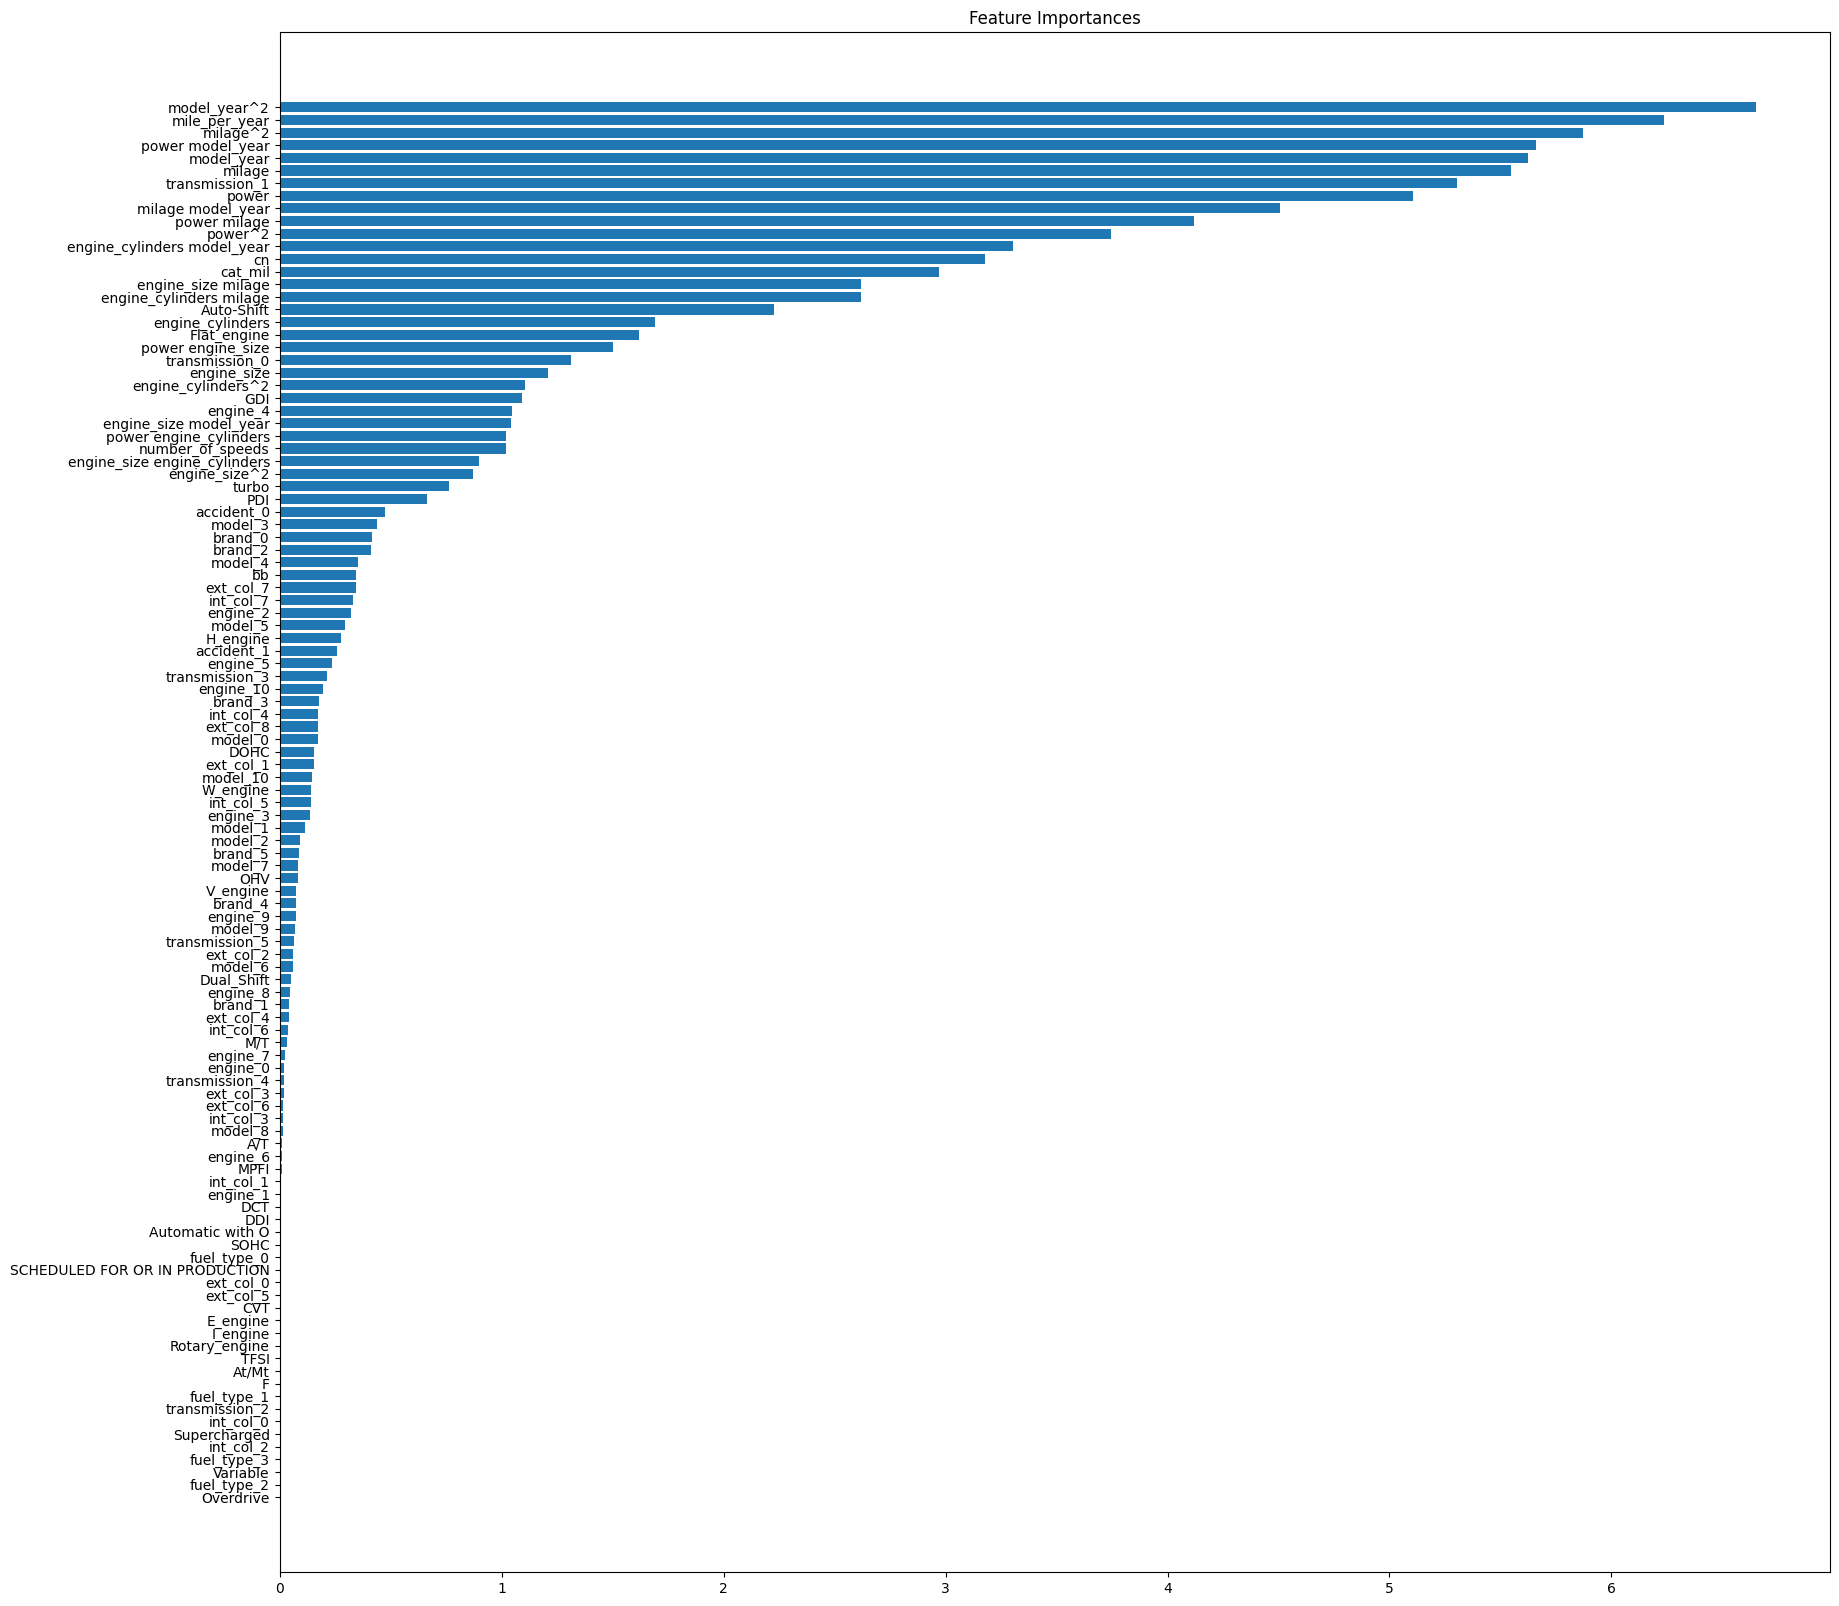

In [52]:
feature_importances = regressor.feature_importances_
sorted_indices = feature_importances.argsort()
plt.figure(figsize=(20, 20))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [X.columns[i] for i in sorted_indices])
plt.title('Feature Importances')
plt.show()

In [25]:
# feat=pd.DataFrame(regressor.feature_importances_,index=X.columns,columns=['importance']).sort_values('importance',ascending=False)
# new_features=feat[feat['importance']>0.001].index.to_list()

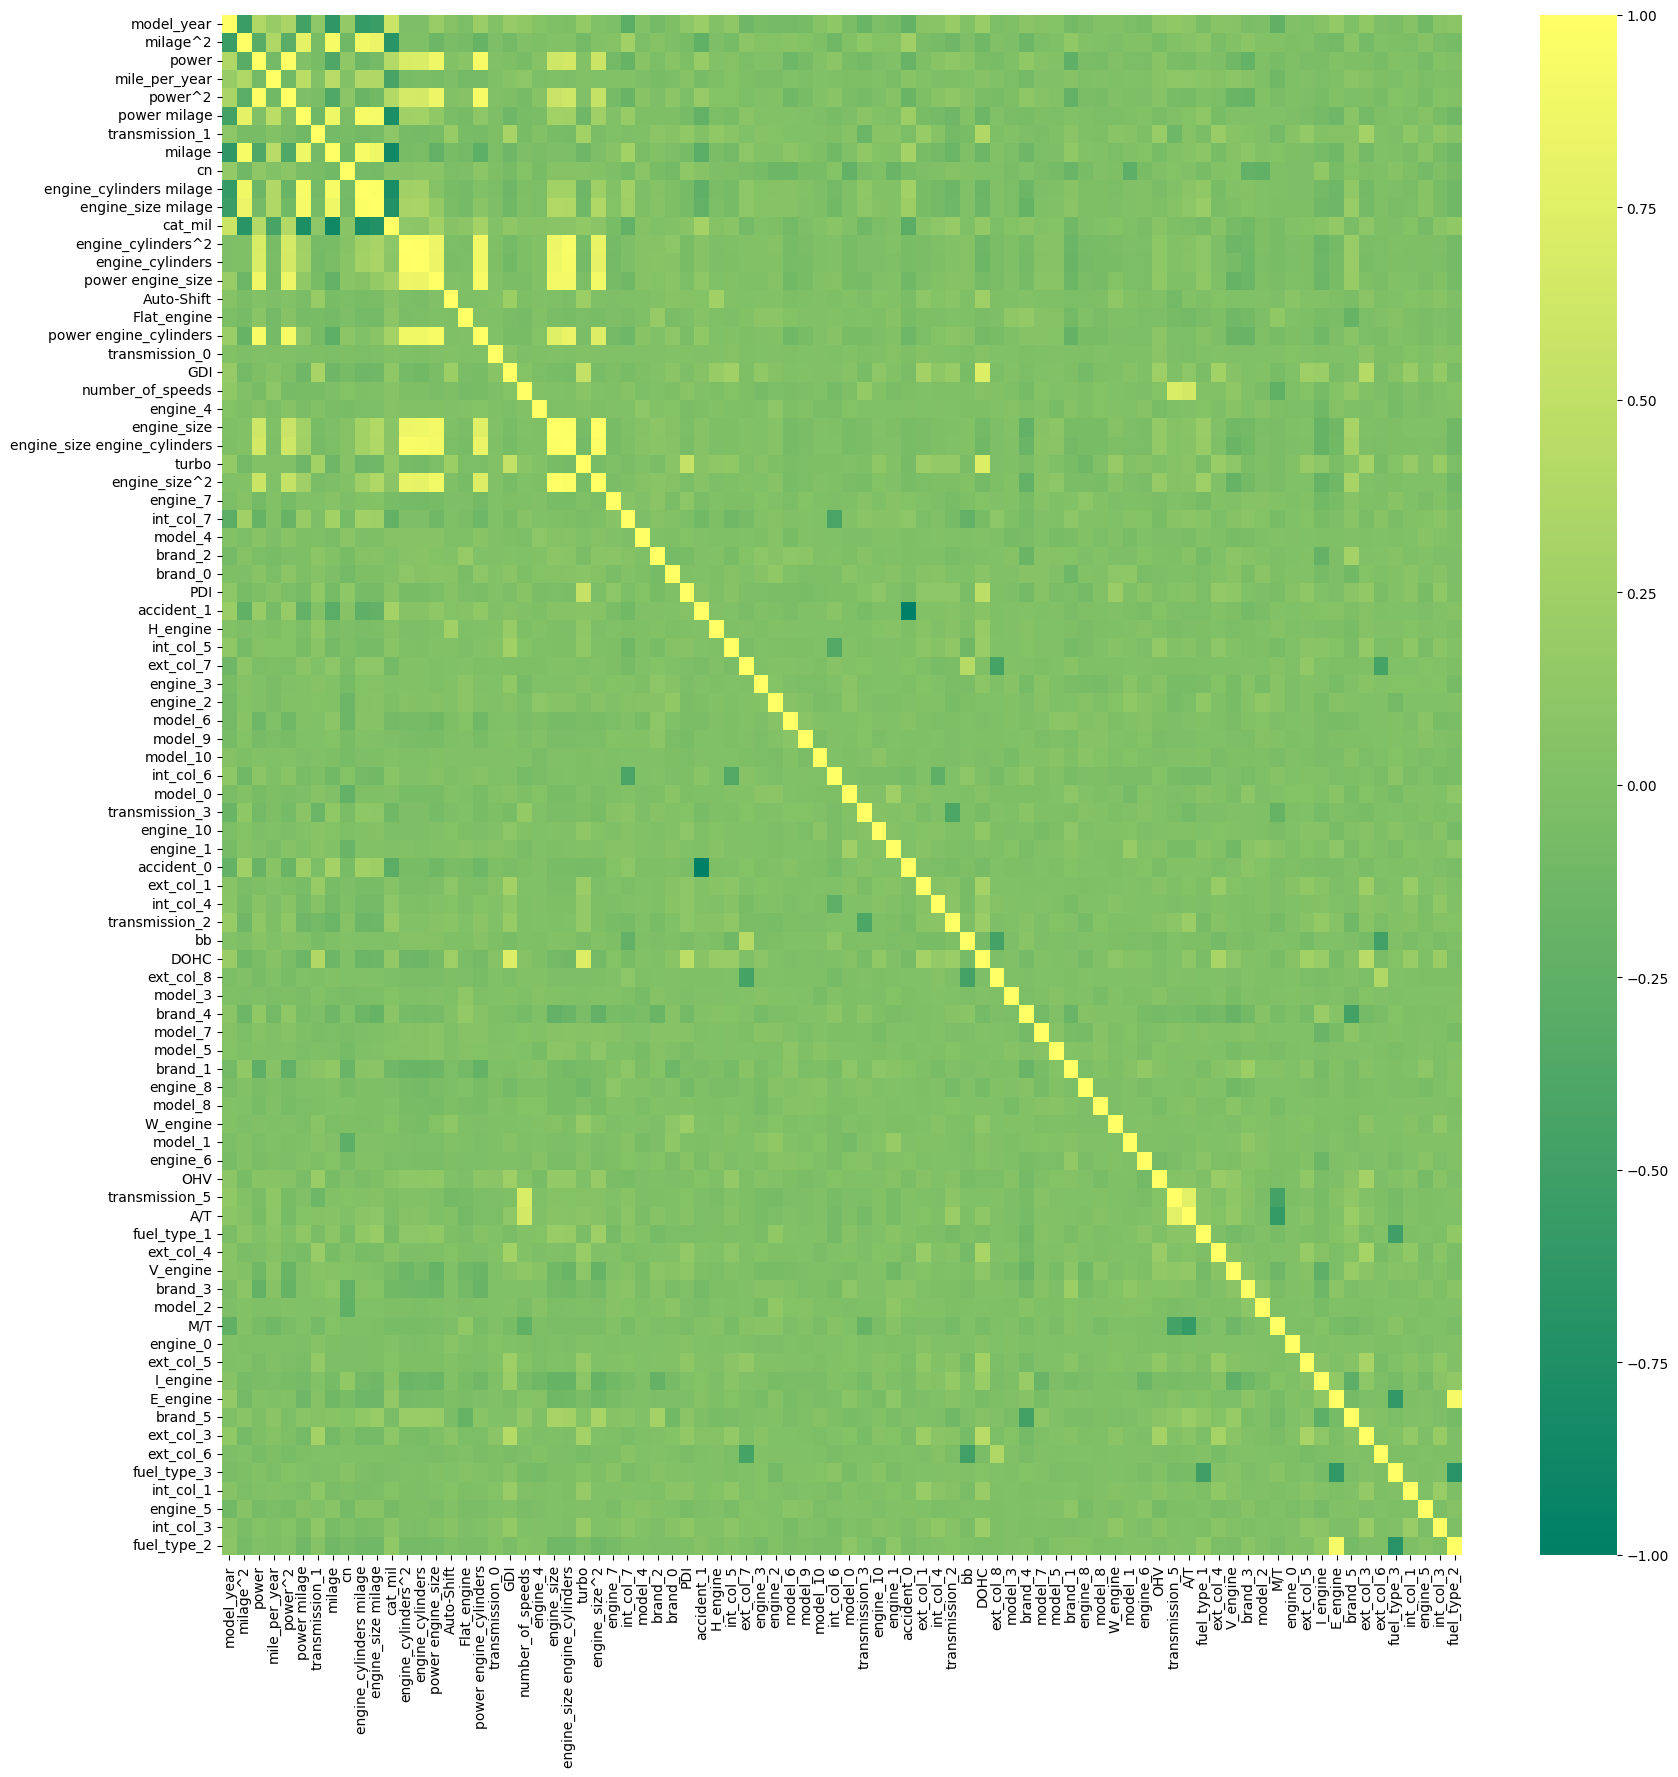

In [42]:
# s=final_df[new_features].corr()
# plt.figure(figsize=(20,20))
# sns.heatmap(s,annot=False,cmap='summer')
# plt.show()

In [29]:
X_test=test.drop(['id','mil_sq'],axis=1)

### Creating Ploynomial Features For Test

In [30]:
# Fit and transform the data
poly_features_t = poly.fit_transform(X_test[columns])
poly_feature_names_t = poly.get_feature_names_out(X_test[columns].columns)
poly_df_t = pd.DataFrame(poly_features_t, columns=poly_feature_names)

In [31]:
# Drop the original columns that were transformed
data_dropped_t = test.drop(columns=columns)

# Combine the transformed columns with the rest of the dataset
final_df_t = pd.concat([data_dropped_t, poly_df_t], axis=1)

In [ ]:
X_test=final_df_t.drop(['id','mil_sq','mil_sq'],axis=1)

In [32]:
# X_test=final_df_t[new_features]

In [33]:
# Predict the prices for the test data
test_predictions = regressor.predict(X_test)

# Add the predictions to the test DataFrame
test['predicted_price'] = test_predictions

# Print or save the test DataFrame with the predictions
print(test[['id', 'predicted_price']].head())

      id  predicted_price
0  54273     23190.117966
1  54274     20786.579082
2  54275     25735.214038
3  54276     62926.451419
4  54277     38455.986155


In [34]:
sub=pd.read_csv('/content/drive/MyDrive/kag fellow/sample_submission.csv')
submission = pd.merge(sub['id'], test[['id', 'predicted_price']], on='id', how='left')

In [35]:
submission.to_csv('/content/drive/MyDrive/kag fellow/GrandFinal+new_feat.csv', index=False)